In [ ]:
#  ========================================================================================================
#  =                                       Loading Data and Packages                                      =
#  ========================================================================================================

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import math
import csv
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
%matplotlib inline


In [2]:
#  ========================================================================================================
#  =                                       Loading DataFrame                                              =
#  ========================================================================================================

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_t = pd.read_csv("train.csv")
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df.shape))

# Now drop the 'Id' column since it's unnecessary for the prediction process.
df.drop(['Id'], axis=1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 

The train data size after dropping Id feature is : (1460, 80) 


In [7]:
#  ========================================================================================================
#  =                              Analyzing the target variable "Sale Price"                              =
#  ========================================================================================================

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
#  ========================================================================================================
#  =                                            Checking the Columns                                      =
#  ========================================================================================================

df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
# =======================         Checking Categorial Data          ======================= 

df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# =======================         Checking Numerical Data          ======================= 

df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorial = len(df.select_dtypes(include=['object']).columns)
numerical = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorial, 'categorical', '+',numerical, 'numerical', '=', categorial+numerical, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


In [11]:
#  ========================================================================================================
#  =                                           Correlation Matrix                                         =
#  ========================================================================================================

df_corr = df.corr()

Text(0.5, 1, 'Heatmap showing the Correlation between variables')

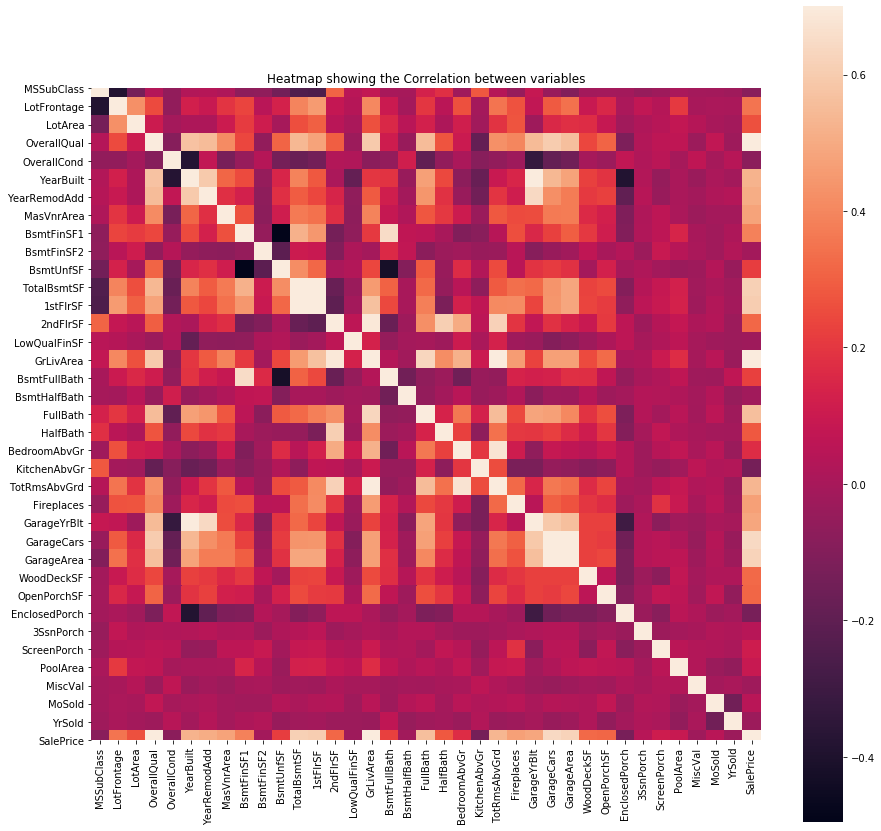

In [12]:
# =======================         Correlation Matrix Heatmap          ======================= 

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, vmax=.7, square=True);
ax.set_title('Heatmap showing the Correlation between variables')

In [13]:
df_temp = df_corr['SalePrice']
df_df = pd.DataFrame(df_temp)
df_df.sort_values(["SalePrice"], axis=0, ascending=False, inplace=True) 
df_df 

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


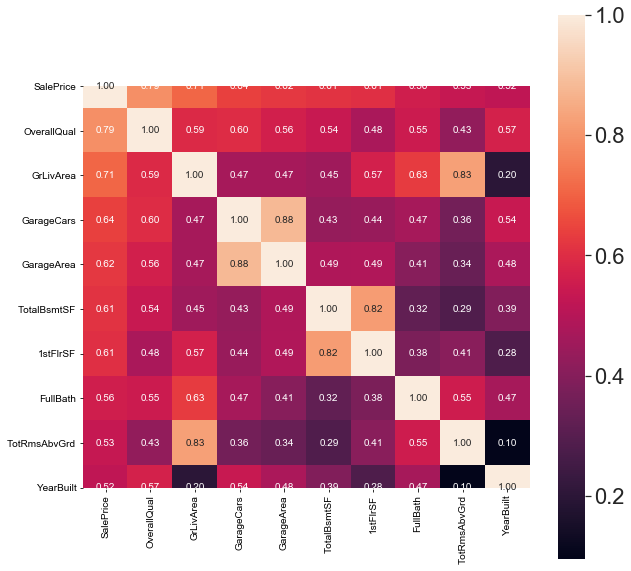

In [14]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = df_df.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


In [16]:
val = df.values
count = 0
for i in range(len(val)):
    for j in range(len(val[i])):
        if not val[i][j]:
            count += 1
print("Null Values =",count)

Null Values = 17364


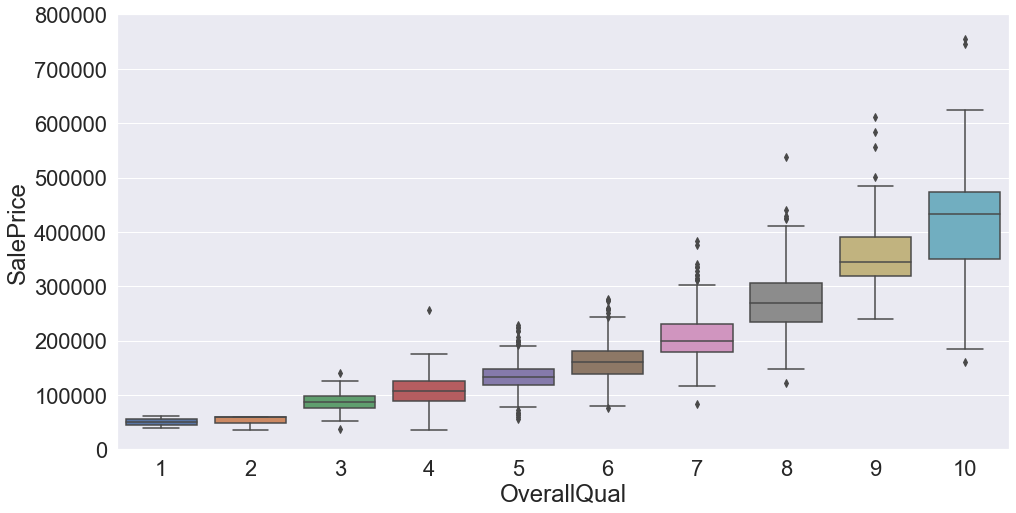

In [17]:
#  ========================================================================================================
#  =                                     Overall Quality vs Sale Price                                    =
#  ========================================================================================================
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [93]:
#df = df.drop(df[(df['SalePrice']>600000)].index).reset_index(drop=True)
               


In [18]:
'''
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
'''

'\nvar = \'OverallQual\'\ndata = pd.concat([df[\'SalePrice\'], df[var]], axis=1)\nf, ax = plt.subplots(figsize=(10,8))\nfig = sns.boxplot(x=var, y="SalePrice", data=data)\nfig.axis(ymin=0, ymax=800000);\n'

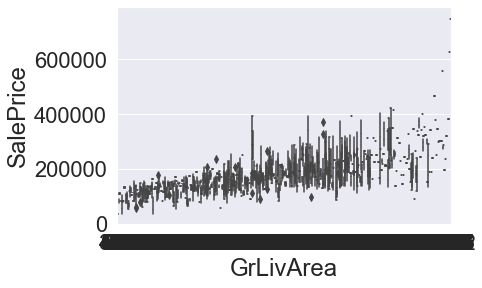

In [19]:
#  ========================================================================================================
#  =                                       Living Area vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GrLivArea'], y=df['SalePrice'])

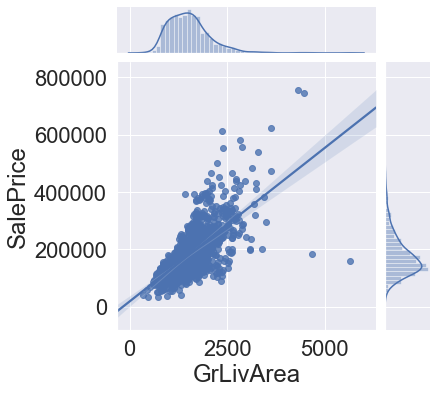

In [20]:
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')
#sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])

In [21]:
#  ========================================================================================================
#  =                                            Removing Outliers                                         =
#  ========================================================================================================

df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index).reset_index(drop=True)

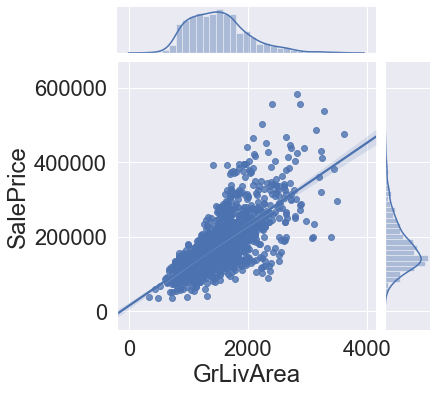

In [98]:
#  ========================================================================================================
#  =                       Living Area vs Sale Price after removing outliers                              =
#  ========================================================================================================
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

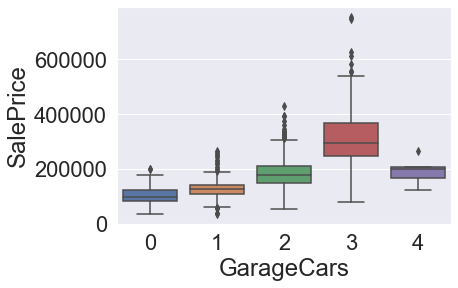

In [22]:
#  ========================================================================================================
#  =                                   Garage Capacity vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

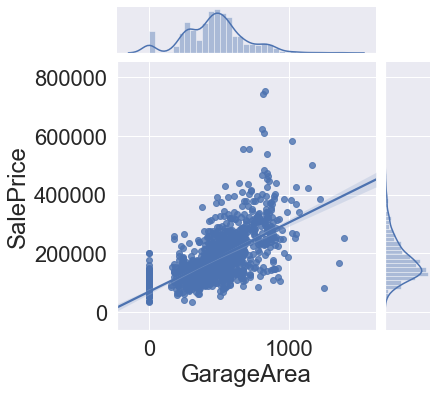

In [23]:
#  ========================================================================================================
#  =                                       Garage Area vs Sale Price                                      =
#  ========================================================================================================

sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

In [24]:
#  ========================================================================================================
#  =                                           Removing Outliers                                          =
#  ========================================================================================================

df = df.drop(df[(df['GarageArea']>1000) 
                         & (df['SalePrice']<300000)].index).reset_index(drop=True)

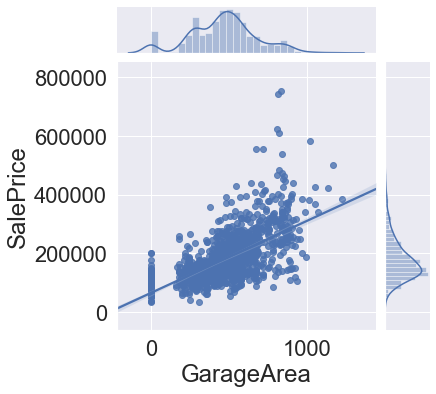

In [25]:
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

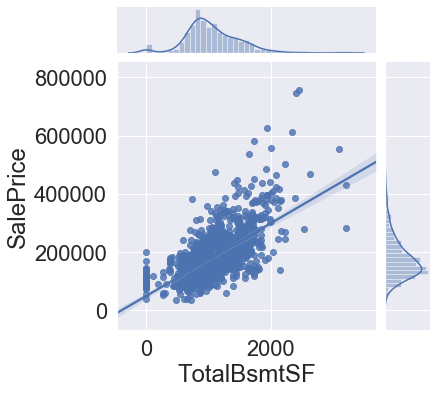

In [26]:
#  ========================================================================================================
#  =                                   Total Basement Area vs Sale Price                                  =
#  ========================================================================================================
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], kind='reg')

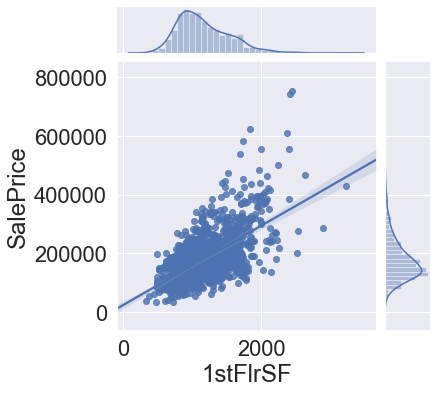

In [27]:
#  ========================================================================================================
#  =                                     First Floor Area vs Sale Price                                   =
#  ========================================================================================================
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], kind='reg')

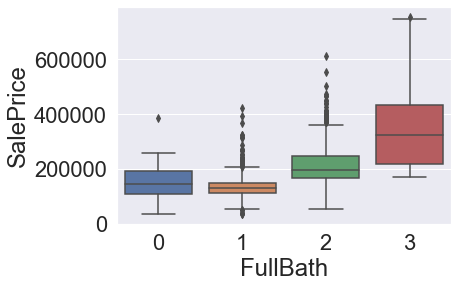

In [28]:
#  ========================================================================================================
#  =                                         Total Bath vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['FullBath'], y=df['SalePrice'])

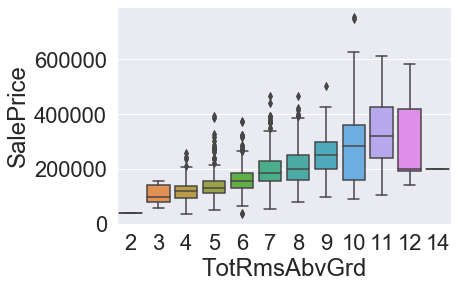

In [29]:
#  ========================================================================================================
#  =                                         Total Rooms vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])

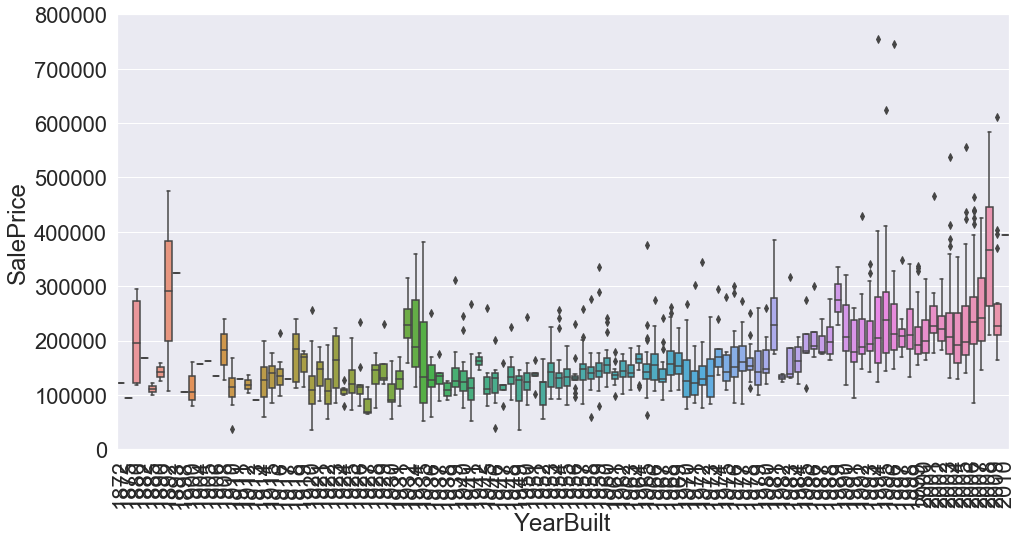

In [30]:
#  ========================================================================================================
#  =                                         Year Built vs Sale Price                                     =
#  ========================================================================================================
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [31]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    missing_data = df.isnull().sum()/len(df)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df)
missing_data




PoolQC          99.586777
MiscFeature     96.349862
Alley           93.732782
Fence           80.647383
FireplaceQu     47.451791
LotFrontage     17.768595
GarageYrBlt      5.578512
GarageType       5.578512
GarageFinish     5.578512
GarageQual       5.578512
GarageCond       5.578512
BsmtFinType2     2.617080
BsmtExposure     2.617080
BsmtFinType1     2.548209
BsmtCond         2.548209
BsmtQual         2.548209
MasVnrArea       0.550964
MasVnrType       0.550964
Electrical       0.068871
dtype: float64

In [32]:
missing_data = missing_data.to_frame()
missing_data.columns = ['count']
missing_data.index.names = ['Name']
missing_data['Name'] = missing_data.index

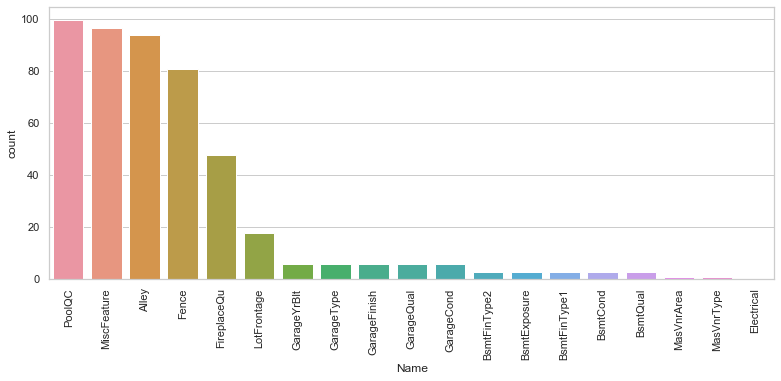

In [33]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=missing_data)
plt.xticks(rotation = 90)
plt.show()

In [34]:
def removeMissingData(df):
    
    df["PoolQC"] = df["PoolQC"].fillna("None")
    df["MiscFeature"] = df["MiscFeature"].fillna("None")
    df["Alley"] = df["Alley"].fillna("None")
    df["Fence"] = df["Fence"].fillna("None")
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")  
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df = df.drop(['Utilities'], axis=1)
    df["Functional"] = df["Functional"].fillna("Typ")
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    df['MSSubClass'] = df['MSSubClass'].fillna("None")

removeMissingData(df)

In [35]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [36]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    return(missing_data)

missing_data = findMissingData(df)
missing_data

,Missing Ratio


In [40]:
#  ========================================================================================================
#  =                                         FIXING SKEWNESS IN DATA                                      =
#  ========================================================================================================

In [ ]:
df


 mu = 12.02 and sigma = 0.40



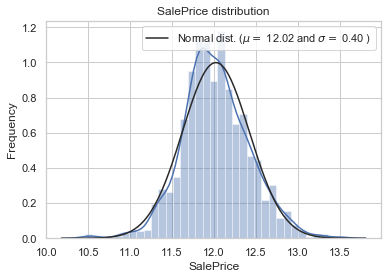

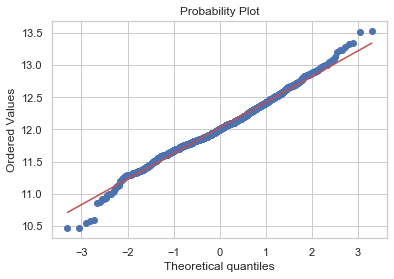

Skewness: 0.121347
Kurtosis: 0.809519


In [37]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_t["SalePrice"] = np.log1p(df_t["SalePrice"])

#Check the new distribution 
sns.distplot(df_t['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_t['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_t['SalePrice'], plot=plt)
plt.show()

y_train = df_t.SalePrice.values

print("Skewness: %f" % df_t['SalePrice'].skew())
print("Kurtosis: %f" % df_t['SalePrice'].kurt())

In [ ]:
#  ========================================================================================================
#  =                                              LINEAR ENCODING                                         =
#  ========================================================================================================


In [38]:
categorialCols = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

In [39]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        print("Values After Transformation ",df[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)


Values before Transformation  ['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['None' 'None' 'None' ... 'None' 'None' 'None']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Values After Transformation  [3 3 0 ... 3 3 3]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'Lvl']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'FR2' 'Inside' ... 'Inside' 'Inside' 'Inside']
Values After Transformation  [4 2 4 ... 4 4 4]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl' 'Gtl' 'Gtl']
Values After Transformation  [0 0 0 ... 0 0 0]
Values be

In [40]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [41]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [42]:
#Take targate variable into y
y = df['SalePrice']

In [43]:
#Delete the saleprice
del df['SalePrice']

In [44]:
#Take their values in X and y
X = df.values
y = y.values

In [45]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=7)

In [46]:
X_test.shape

(1162, 79)

In [47]:
#  ========================================================================================================
#  =                                       Writng the differences to a file                               =
#  ========================================================================================================
def fileWriter(regressor,model,X_test):
    print("Actual Value","\t","Predicted Value","\t","Accuracy (%)")
    header = "Actual Value" + "," + "Predicted Value" + "," +  "Accuracy (%)"
    name = 'FinalPrediction_'+ regressor + '.csv'
    f = open(name,'w')
    f.write(header + '\n')
    for i in range(len(X_test)):
        temp = str(model.predict([X_test[i]]))
        temp = temp.replace("[","") 
        temp = temp.replace("]","") 
        diffPercent = 100 - (abs((float(y_test[i]) - float(temp)) * 100) / float(y_test[i]))
        predicted_value = (str(y_test[i]) + "," + temp + "," + str(diffPercent))
        print(str(y_test[i]) + "\t" + "\t" + temp + "\t" + "\t" + str(diffPercent))
        f.write(predicted_value + '\n')
    f.close()


In [48]:
def sorterFunction(regressor):
    name = 'FinalPrediction_'+ regressor + '.csv'
    print(name)
    data = csv.reader(open(name),delimiter=',')
    sortedlist = sorted(reader, key=lambda row: row[3], reverse=True)

In [ ]:
#  ========================================================================================================
#  =                                              Regression                                              =
#  ========================================================================================================

In [49]:
#  ==================================       LINEAR REGRESSION      ============================================
model_linear = linear_model.LinearRegression()


#  ==================================      RANDOM FOREST           ============================================
model_randomForest = RandomForestRegressor(n_estimators=1000)


#  ==================================      GRADIENT BOODST         ============================================
model_GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)


#  ==================================      ELASTIC NET             ============================================
model_eNET = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)


In [ ]:
#  ========================================================================================================
#  =                                        FITTING THE MODEL                                             =
#  ========================================================================================================

In [50]:
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
model_randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
model_eNET.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37504933717.107254, tolerance: 225782549.05836174
  positive)


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#  ========================================================================================================
#  =                                     PREDICTING THE VALUE                                             =
#  ========================================================================================================

In [54]:
print("=================================       LINEAR REGRESSION      ============================================")
temp = str(model_linear.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))
      
print("=================================      FOREST FOREST           ============================================")
temp = str(model_randomForest.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

print("=================================      GRADIENT BOODST         ============================================")
temp = str(model_GBR.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

print("=================================      ELASTIC NET             ============================================")
temp = str(model_eNET.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

=================================       LINEAR REGRESSION      ============================================
Predict value 116435.68906724
Real value 125500
=================================      FOREST FOREST           ============================================
Predict value 117044.296
Real value 125500
=================================      GRADIENT BOODST         ============================================
Predict value 109219.90128243
Real value 125500
=================================      ELASTIC NET             ============================================
Predict value 116453.93843167
Real value 125500


In [ ]:
#  ========================================================================================================
#  =                                           MODEL ACCURACY                                            =
#  ========================================================================================================

In [55]:
print("=================================      LINEAR REGRESSION       ============================================")
print("Score --> ", model_linear.score(X, y)*100)
      
print("=================================      FOREST FOREST           ============================================")
print("Score --> ", model_randomForest.score(X_test, y_test)*100)

print("=================================      GRADIENT BOODST         ============================================")
print("Score --> ", model_GBR.score(X_test, y_test)*100)

print("=================================      ELASTIC NET             ============================================")
print("Score --> ", model_eNET.score(X_test, y_test)*100)


=================================      LINEAR REGRESSION       ============================================
Score -->  83.63962165880405
=================================      FOREST FOREST           ============================================
Score -->  87.87796473473539
=================================      GRADIENT BOODST         ============================================
Score -->  89.0702237161894
=================================      ELASTIC NET             ============================================
Score -->  80.27052024585632


In [58]:
#  ========================================================================================================
#  =                  Writng the differences to a file for Linear Regression                              =
#  ========================================================================================================

fileWriter("LinearRegression",model_linear,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175239.40175119		98.70554812069943
150900		174998.09384126		84.03042157636845
173500		169324.35668216		97.59328915398271
246578		227938.88507844		92.44088486338603
227680		247906.58958006		91.11622031796381
214000		190120.38762687		88.8413026293785
154000		218934.14153779		57.834973027409085
95000		79114.94897033		83.27889365297895
64500		70014.67745611		91.45011247114728
171000		161300.48800465		94.32777076295321
153900		104693.29384629		68.02683160902535
185000		170517.26365526		92.17149386770811
318061		303052.45543029		95.28123706782347
122000		119467.25874658		97.92398257916393
159000		214087.81870181		65.35357314351572
167900		189286.31658368		87.26246778815963
139000		138733.1608968		99.80802942215827
160000		87546.05870959		54.71628669349375
277000		329428.17116701		81.07286239458124
145500		137277.05951856		94.34849451447424
173000		166767.03360389		96.39712925080347
145000		160068.33858777		89.60804235326206
239000		224600

124000		140730.53603908		86.50763222654838
176000		169038.14362823		96.04439978876704
132000		115126.55546529		87.21708747370455
235000		252156.41776713		92.6993966948383
119900		105812.46779252		88.2505986593161
281213		270713.792503		96.26645727722402
372402		345552.22250079		92.79010921015194
306000		301744.66251066		98.60936683354902
310000		291612.16914359		94.06844165922259
118000		146428.9962293		75.90763031415253
221000		185775.72723786		84.06141503975566
127000		133926.74446124		94.54587050296063
125000		113569.03363397		90.855226907176
177500		172691.20906737		97.29082200978591
115000		166256.14049147		55.42944305089566
115000		121814.15164526		94.07465074325216
217000		228464.68952871		94.71673293607834
139600		119764.94562323		85.791508326096
95000		102376.92786291		92.23481277588421
212000		225344.81706288		93.70527497033962
110500		114698.27750994		96.20065383715837
156500		151705.00512806		96.93610551313738
145000		152002.34388179		95.17079732290344
147000		149773.888432

234000		202560.17999719		86.56417948597863
120000		101386.65428781		84.488878573175
174000		198237.5354099		86.07038194833333
117000		129619.14715797		89.21440413848718
269500		225597.65934819		83.70970662270501
177000		186007.20434468		94.91118398605649
301500		338125.35834189		87.85228579041792
115000		96075.37385716		83.54380335405217
162500		163869.37584859		99.15730717009846
225000		236948.99234964		94.68933673349333
194000		183907.08079719		94.79746432844846
93500		46948.15314455		50.21192849684492
271000		275994.93329638		98.1568511821476
169500		171202.85583222		98.99536529072567
179665		198575.20083763		89.47474419746194
164990		189460.81975413		85.16830125817928
124900		153524.29990642		77.08222585554844
402861		367340.95480556		91.18305192251421
200141		195462.7130756		97.66250447214715
173000		217199.79754755		74.4509840765607
145000		143227.04290309		98.77727096764828
386250		398067.2415276		96.94051999285438
122000		92272.85243031		75.63348559861475
80500		71092.21583864	

125000		130319.65241213		95.74427807029599
80000		94475.4800008		81.90564999899999
187100		193357.62084795		96.65546721114377
348000		310939.29638104		89.35037252328736
100000		76895.67007894		76.89567007894
110000		119204.74880559		91.63204654037273
163990		178306.24380978		91.27005072883713
105000		126846.15685039		79.1941363329619
117500		174008.88985198		51.907327785548944
194500		213531.40741243		90.21521469797943
266000		290999.37050208		90.60174041275188
224000		234832.04356448		95.16426626585714
223500		208870.19635739		93.45422655811633
192500		195312.81731827		98.5387961983013
143000		164527.56929628		84.94575573686713
282922		246416.87210917		87.09710524779622
135750		119194.15885695		87.80416858707183
283463		289880.13169587		97.7361660266525
143750		149152.51930878		96.24172569824
285000		344044.84825738		79.28250938337544
123000		130249.56164835		94.10604744036586
177000		194145.96425411		90.31301454570057
556581		413123.44394594		74.22521500840668
181900		153474.85105095

166000		203954.38163573		77.13591467727107
216500		223925.94412831		96.57000271209701
174000		192468.79927455		89.38574754336207
67000		65698.85456269		98.05799188461194
140000		142786.33148686		98.00976322367143
213000		190781.89119119		89.56896300055868
239000		281264.91836927		82.31593373670712
114504		146757.40303936		71.83207308097533
140200		154698.84626822		89.6584548728816
144000		153845.11880305		93.1631119423264
167000		253730.06428693		48.0658297683054
159000		169619.42809022		93.32111440866667
501837		467979.42430853		93.25327233913202
137500		149174.02094365		91.50980295007274
82000		28061.38814519		34.22120505510976
157000		144127.79562418		91.80114370966879
184100		183492.51283004		99.67002326455187
127500		54286.99772422		42.57803743076078
124900		147142.79768526		82.19151506384307
129000		93896.28483393		72.78781770072092
143000		133658.7257917		93.46764041377622
128000		105092.00214559		82.10312667624218
275000		248618.35009822		90.40667276298909
235000		248600.148573

In [57]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Random Forest                              =
#  ========================================================================================================

fileWriter("RandomForest",model_randomForest,X_test)

Actual Value 	 Predicted Value 	 Accuracy (%)
173000		188002.183		91.32821791907514
150900		166740.728		89.50249966865474
173500		169257.419		97.5547083573487
246578		217862.428		88.35436575850238
227680		214186.26		94.07337491215742
214000		213943.161		99.97343971962617
154000		183626.919		80.76174090909092
95000		144263.887		48.14327684210527
64500		104746.263		37.6026930232558
171000		159517.738		93.2852269005848
153900		153401.694		99.67621442495125
185000		167276.289		90.41961567567567
318061		310045.422		97.47986141023263
122000		213676.514		24.85531639344262
159000		173827.857		90.67430377358491
167900		165340.638		98.47566289458011
139000		137341.43		98.80678417266186
160000		133112.429		83.195268125
277000		224663.995		81.10613537906137
145500		139483.168		95.86472027491409
173000		164318.963		94.98205953757224
145000		161506.323		88.61632896551724
239000		262947.808		89.97999665271966
134432		154452.338		85.10746102118544
175000		155197.56		88.68432
180000		161706.783		89.837

132500		139539.521		94.68715396226415
136500		136057.065		99.6755054945055
160000		150558.132		94.09883250000001
143000		152806.9		93.14202797202798
119000		138587.559		83.53986638655462
208900		183236.071		87.71473001436094
201000		226175.257		87.47499651741293
87000		102993.654		81.61648965517242
274300		249090.163		90.80939227123588
169000		180508.151		93.19044319526627
290000		278745.112		96.11900413793104
271000		275959.822		98.1698073800738
466500		404179.912		86.6409243301179
124500		137155.162		89.83521124497992
98000		119350.946		78.21332040816327
250000		281035.593		87.5857628
128500		135639.679		94.44382957198444
158000		162115.466		97.39527468354432
140000		141503.265		98.92623928571427
218000		171400.918		78.62427431192661
91300		99495.451		91.02360240963856
143500		140304.43		97.77312195121951
189000		207463.769		90.23081005291006
286000		260187.151		90.97452832167832
145250		148041.19		98.07835456110155
167900		163968.568		97.65846813579512
127000		134424.663		94.1538086

93500		97455.707		95.76929732620322
271000		254716.652		93.99138450184502
169500		154095.039		90.91152743362831
179665		174532.519		97.14330503993544
164990		196232.305		81.06412206800412
124900		147373.201		82.0070448358687
402861		381581.815		94.71798337391805
200141		205165.24		97.48964979689319
173000		182666.894		94.4122
145000		120720.941		83.25582137931035
386250		382034.953		98.90872569579288
122000		116673.565		95.63406967213115
80500		90681.2		87.35254658385094
134000		150403.508		87.75857611940299
178000		176811.025		99.33203651685393
281000		272578.941		97.0031818505338
167000		150618.4		90.19065868263473
133000		127370.448		95.76725413533835
140000		149192.06		93.43424285714286
109900		112521.364		97.61477343039127
110000		111513.451		98.62413545454545
133000		152977.471		84.97934511278196
134800		128278.199		95.16186869436201
126000		131754.64		95.4328253968254
156000		141520.666		90.71837564102563
192000		222307.723		84.21472760416667
145000		152823.908		94.6042013793103

137000		161039.336		82.45303941605839
165000		152736.419		92.56752666666667
107500		151878.231		58.7179246511628
127000		130528.929		97.22131574803149
104000		172295.938		34.33082884615385
222500		235761.217		94.03990247191011
248900		267743.137		92.42943471273604
115000		145024.853		73.89143217391305
236000		241290.152		97.75841016949153
147000		135639.567		92.2718142857143
254900		237234.162		93.06950255001962
260000		264301.185		98.34569807692307
207500		188953.785		91.06206506024097
200000		235414.689		82.2926555
129900		121873.019		93.82064588144726
81000		111080.917		62.863065432098765
172500		160406.364		92.98919652173913
179540		185954.305		96.42736716052134
188500		177811.588		94.3297549071618
280000		239794.71		85.64096785714285
158500		142325.894		89.7955167192429
256000		191446.28		74.783703125
210000		168413.268		80.19679428571429
129000		217370.526		31.495716279069754
112500		127034.496		87.080448
235000		205903.341		87.6184429787234
149500		162270.25		91.45802675585284
1

200000		208130.631		95.9346845
125000		133888.834		92.88893279999999
80000		94624.598		81.71925250000001
187100		205430.5		90.20283270978086
348000		312207.219		89.71471810344828
100000		116732.13		83.26786999999999
110000		140359.656		72.40031272727273
163990		171920.409		95.16408988352947
105000		122985.771		82.8706942857143
117500		175331.063		50.78207404255319
194500		188862.477		97.10153059125965
266000		294514.428		89.2802902255639
224000		202875.987		90.56963705357143
223500		213416.125		95.48819910514541
192500		201882.71		95.12586493506494
143000		154894.872		91.68190769230769
282922		249563.626		88.20933896975137
135750		117404.169		86.48557569060773
283463		276016.917		97.37317286559446
143750		135502.09		94.26232347826087
285000		312029.434		90.51598807017544
123000		124456.293		98.81602195121951
177000		168725.377		95.32507175141244
556581		390106.778		70.08984819819577
181900		164115.043		90.22267344694887
194000		197906.539		97.9863201030928
178000		175921.239		98.832156

140000		134555.025		96.11073214285715
213000		188940.714		88.70456056338028
239000		287766.441		79.59563138075313
114504		130030.115		86.44054792845664
140200		146350.995		95.61269971469329
144000		188945.426		68.7878986111111
167000		170078.879		98.15635988023953
159000		162625.557		97.71977547169811
501837		438246.478		87.32845087149812
137500		144415.295		94.97069454545453
82000		98725.357		79.6032231707317
157000		147170.6		93.73923566878982
184100		174904.543		95.00518359587181
127500		118495.686		92.93779294117647
124900		119905.502		96.00120256204963
129000		125306.315		97.13667829457364
143000		128566.828		89.90687272727273
128000		149952.854		82.84933281250001
275000		265263.315		96.45938727272727
235000		239903.814		97.91327063829786
135000		131924.893		97.72214296296298
155000		141275.688		91.14560516129032
139000		135735.418		97.65137985611511
79900		127360.235		40.600456821026285
203000		209736.627		96.6814645320197
110000		118925.239		91.88614636363636
185850		200576.494	

In [59]:
#  ========================================================================================================
#  =                  Writng the differences to a file for Gradient Boost                                 =
#  ========================================================================================================

fileWriter("GragientBoostRegression",model_GBR,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		193145.2126764		88.35536839514451
150900		170902.35514833		86.74462879500993
173500		161951.40946341		93.3437518521095
246578		223620.72469177		90.68964980321441
227680		214104.56868334		94.0374950295766
214000		213828.52208589		99.91987013359346
154000		185238.76662528		79.71508660696104
95000		132245.0536049		60.794680415894746
64500		104993.65275982		37.219143008031004
171000		160514.68777059		93.86823846233334
153900		163494.6905411		93.76563317667318
185000		176818.29126091		95.57745473562701
318061		316275.50554197		99.4386314392428
122000		184760.23282305		48.55718621061475
159000		174436.32646335		90.29161857650944
167900		171084.70511901		98.10321315127456
139000		148336.1394546		93.28335291035971
160000		131085.31763127		81.92832351954375
277000		254053.66072379		91.71612300497834
145500		140995.83202951		96.90435191031615
173000		164907.57669427		95.3222986672081
145000		154147.75317064		93.69120470990345
239000		259983.0

372402		323441.35225659		86.85274307242979
306000		290262.09532366		94.85689389662092
310000		343938.97514221		89.0519435025129
118000		116787.85026538		98.97275446218643
221000		205968.4616984		93.19839895855203
127000		136432.2205562		92.5730546801575
125000		122527.57748757		98.022061990056
177500		167733.83650595		94.49793605969013
115000		131803.09483038		85.38861319097391
115000		111275.29395106		96.76112517483477
217000		182793.38367386		84.23658233818433
139600		141140.83970982		98.89624662620345
95000		90275.68344642		95.02703520675789
212000		210454.56980016		99.27102349064151
110500		96177.42580735		87.03839439579185
156500		142528.7814146		91.07270377929713
145000		152492.72389237		94.83260421215861
147000		149151.31090368		98.53652319477553
179000		178547.66710248		99.7473000572514
130000		142161.54174774		90.64496788635384
132500		150021.89905034		86.77592524502641
136500		127901.11382143		93.7004496860293
160000		147029.62507547		91.89351567216875
143000		161488.80354021

120000		129341.45665912		92.21545278406667
174000		169189.32566519		97.23524463516667
117000		144970.4154411		76.09366201615386
269500		248115.14534438		92.06498899605937
177000		166613.01135483		94.13164483323729
301500		333373.29713747		89.42842549337645
115000		109579.26501519		95.28631740451304
162500		163813.92376643		99.19143152835076
225000		249833.95499217		88.96268667014667
194000		211978.72669065		90.73261510791238
93500		78086.74583672		83.51523618900535
271000		256233.34980524		94.55105158864944
169500		149411.70899303		88.14850088084367
179665		180833.86483832		99.3494198434197
164990		196569.18577044		80.85993952940177
124900		148814.9671401		80.85270845468375
402861		376002.60934596		93.33308742865654
200141		207078.97074316		96.5334585401492
173000		186641.62292811		92.11466882768208
145000		120663.59851808		83.21627484005518
386250		379389.88415995		98.22391822911327
122000		114025.0501678		93.4631558752459
80500		78137.44419749		97.06514807141615
134000		142407.374041

107500		119991.36735103		88.3801233943907
127000		128238.46366403		99.0248317606063
104000		163692.09821987		42.60375171166345
222500		242932.61172214		90.81680372038652
248900		265994.53627478		93.13196614110888
115000		144547.06079469		74.30690365679129
236000		232357.1417025		98.4564159756356
147000		139935.74075559		95.19438146638775
254900		218336.63149375		85.65579893830915
260000		264022.80702651		98.45276652826539
207500		186568.39305156		89.91247857906507
200000		242651.52439106		78.67423780447001
129900		125505.1341102		96.61673141662817
81000		98068.88934862		78.92729710046915
172500		161817.96589156		93.80751645887536
179540		187523.46464022		95.55337827769857
188500		182960.66651293		97.06136154532096
280000		225029.03631065		80.36751296808929
158500		155626.10494471		98.18681699981704
256000		208642.87638639		81.5011235884336
210000		178095.59507247		84.8074262249857
129000		216798.25574953		31.939336628271306
112500		125923.35915922		88.06812519180446
235000		206432.6657

305000		315156.62700048		96.66995836049836
125000		132906.3251031		93.67493991751999
129000		109522.95322614		84.9015141287907
242000		301879.42250061		75.256436983219
212900		227761.87702386		93.01931562993894
245000		260840.32739109		93.5345602485347
96500		99099.4926607		97.30622522207254
191000		246824.88483325		70.77231160562827
190000		194772.30589316		97.48826005623158
104900		119533.0588442		86.05046821334605
129500		131816.50199001		98.21119537450966
128000		132924.22133675		96.15295208066406
179900		227444.1265939		73.57191406675932
181134		206055.37006002		86.24147313037861
133000		143832.4202744		91.85532310195488
118000		113644.36832931		96.30878671975424
84500		145416.04028707		27.910011494591714
314813		328841.73133582		95.5437890634059
84900		100983.72606667		81.0556819002709
160000		163631.41459111		97.73036588055625
123600		127196.35419118		97.09032832428802
101800		109109.65023887		92.81959701486247
205000		201130.3343052		98.11235819765854
220000		232747.31068923		9

In [60]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Elastic NET                                =
#  ========================================================================================================

fileWriter("ElasticNetRegression",model_eNET,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175408.81084406		98.60762378956069
150900		175250.28094662		83.86329957149104
173500		169278.355662		97.56677559769452
246578		227892.41595459		92.42203925516063
227680		247980.38562053		91.08380814277496
214000		190108.96174472		88.83596343211215
154000		218988.74342613		57.79951725575974
95000		79528.98980063		83.71472610592633
64500		70387.61834239		90.87190954668218
171000		161253.31082876		94.30018177120468
153900		104684.28041178		68.02097492643274
185000		169673.22833182		91.71525855774054
318061		303033.90535743		95.27540483034072
122000		119040.98542853		97.57457822010656
159000		214048.10062802		65.37855306413836
167900		189157.39739995		87.33925110187613
139000		138691.85242982		99.77831110058992
160000		87678.10736032		54.798817100200004
277000		328926.92479817		81.25381776239351
145500		137300.03609874		94.36428597851547
173000		166741.27474425		96.38223973656069
145000		159894.65297205		89.72782553651723
239000		224522

118000		122315.19283698		96.34305691781356
113000		89192.81810622		78.93169743913275
125000		115777.32443296		92.621859546368
124000		140483.08099871		86.7071927429758
176000		169155.25182188		96.1109385351591
132000		115423.7715307		87.44225115962122
235000		252176.75470007		92.69074268082127
119900		105691.49670152		88.1497053390492
281213		270703.50260583		96.26279816574271
372402		345609.88744521		92.80559380594357
306000		301751.6546997		98.61165186264707
310000		291420.22077706		94.00652283130968
118000		146503.20689351		75.84473992075422
221000		185768.40477061		84.05810170615838
127000		134356.02928018		94.20785096048819
125000		113669.6773514		90.93574188112
177500		172631.27209223		97.25705469984788
115000		165956.85940996		55.68968746960001
115000		121881.45624706		94.01612500255652
217000		228563.81257995		94.67105411062212
139600		119700.44957158		85.74530771603152
95000		102298.79966525		92.31705298394736
212000		225142.26996559		93.80081605396698
110500		114844.53708726	

142000		201293.25910001		58.24418373238732
163000		215189.44542962		67.98193531925153
179000		160653.62452326		89.75062822528491
116900		89889.10895219		76.89401963403765
190000		228620.02608509		79.67367048153157
109500		98009.93690968		89.50679169833789
186700		84365.92738927		45.187963250814136
237000		252253.23925463		93.56403406977637
130500		125863.41867603		96.44706411956322
157000		178517.72504344		86.29444264749044
112500		123122.40718057		90.55786028393779
122500		138497.00115977		86.94122354304488
102000		-16732.42239944		-16.404335685725485
202500		219351.86960242		91.6780890852247
94500		99198.46781128		95.02807639017989
39300		30584.65249086		77.82354323374045
240000		295184.81688721		77.00632629699584
155000		159937.37076195		96.81459950841935
180000		185829.20096677		96.76155501846111
175000		193895.66991454		89.20247433454858
230000		200980.73676116		87.3829290265913
97000		115519.10592305		80.90813822365979
98300		85687.08848158		87.16896081544252
180500		192287.88786

139000		133057.81722904		95.72504836621583
129500		166053.63874229		71.7732519364556
93000		54671.81028778		58.786892782559136
159500		253785.74387514		40.886680956025074
135000		124535.19067117		92.24828938605185
239000		253540.92383924		93.91593144801675
83500		89765.24644077		92.49671084937724
171000		143841.08777462		84.11759518983627
121500		183746.66881108		48.76817381804116
165000		203374.57135122		76.74268402956365
372500		339206.31538646		91.06209809032482
215000		228492.16779606		93.72457311811162
125000		156982.06610413		74.41434711669599
172400		181521.1302031		94.70932122790023
165500		227234.67196408		62.69808340538973
174500		194688.13507781		88.43086815025215
78000		75117.2589265		96.30417811089744
187500		213798.86055027		85.973941039856
181000		171728.13742735		94.87742399301105
219500		180490.39186057		82.22796895697951
128000		130124.25008321		98.34042962249218
200624		215620.38940606		92.52512690103875
164500		184309.70251775		87.9576276487842
374000		360245.440013

255000		246941.67980353		96.83987443275686
155000		162397.68033206		95.2273030115742
145000		167633.15274501		84.39092914137241
167500		159177.00847671		95.03104983684179
90000		36736.77800673		40.8186422297
149000		126730.05490234		85.05372812237584
228950		150767.88735636		65.8518835363005
200500		210439.75169099		95.04251785985537
130000		131083.93489319		99.1662039283154
112000		153015.6096025		63.378919997767866
173000		184046.9146727		93.61450018919076
141000		125348.42460343		88.89959191732623
209500		223871.85291239		93.13992701079236
410000		390135.66960805		95.15504136781708
87000		83745.41366225		96.25909616350575
185000		150191.23218186		81.18444982803243
105000		39943.55028428		38.04147646121904
200000		135054.73369626		67.52736684813
125000		130317.63781814		95.745889745488
80000		94521.03319709		81.8487085036375
187100		193397.18492756		96.63432125731694
348000		310932.77608269		89.3484988743362
100000		77139.94451171		77.13994451171
110000		119285.98575721		91.558194766

220000		236246.49387917		92.61523005492272
259500		268572.5905069		96.5038186871291
140000		163662.29128078		83.09836337087144
224900		217717.42800497		96.80632636948421
165000		177432.75659767		92.46499600141212
168500		106827.79552335		63.39928517706231
124000		136722.54991045		89.7398791044758
144500		148189.07294917		97.44700833967475
231500		214646.32851507		92.71979633480345
135000		220809.64247703		36.437301868866676
166000		203764.56264554		77.25026346654218
216500		223840.16987259		96.60962130596305
174000		192477.73813241		89.38061026872988
67000		65228.21227183		97.35554070422388
140000		142254.32413503		98.38976847497857
213000		190609.97747108		89.48825233384038
239000		281439.65600323		82.24282175597071
114504		146498.26509878		72.05838652031372
140200		154778.3353109		89.60175798081312
144000		153721.19612023		93.2491693609514
167000		253676.18379996		48.098093532958075
159000		169667.62801596		93.29079998996225
501837		467979.51334269		93.25329008078121
137500		149238.9

In [157]:
df.to_csv("dft.csv")

In [335]:
#  ========================================================================================================
#  =                                           Using the Test Data                                        =
#  ========================================================================================================

In [336]:
df_test = pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,2619,20,RL,90,11727,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1156,2620,60,RL,60,8238,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1157,2621,60,RL,50,13041,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1158,2622,60,RL,54,9783,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [337]:
df_test = df_test.drop(['Id'], axis=1)
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,20,RL,90,11727,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1156,60,RL,60,8238,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1157,60,RL,50,13041,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1158,60,RL,54,9783,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [377]:
# Find Missing Ratio of Dataset
def findMissingData(df_test):
    missing_data = df_test.isnull().sum()/len(df_test)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df_test)

In [378]:
def removeMissingData(df_test):
    
    df_test.MasVnrType.replace('NA','0').astype(float)
    df_test.MasVnrArea.replace('NA','0').astype(float)
    df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna("None")
    df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna("None")
    df_test["BsmtHalfBath"] = df_test["BsmtHalfBath"].fillna("None")
    df_test["BsmtFullBath"] = df_test["BsmtFullBath"].fillna("None")
    df_test["GarageArea"] = df_test["GarageArea"].fillna("None")  
    df_test["GarageCars"] = df_test["GarageCars"].fillna("None")
    df_test["TotalBsmtSF"] = df_test["TotalBsmtSF"].fillna(0)
    df_test["BsmtUnfSF"] = df_test["BsmtUnfSF"].fillna("None")  
    df_test["BsmtFinSF2"] = df_test["BsmtFinSF2"].fillna("None")
    df_test["BsmtFinSF1"] = df_test["BsmtFinSF1"].fillna(0)    
    df_test["PoolQC"] = df_test["PoolQC"].fillna("None")
    df_test["MiscFeature"] = df_test["MiscFeature"].fillna("None")
    df_test["Alley"] = df_test["Alley"].fillna("None")
    df_test["Fence"] = df_test["Fence"].fillna("None")
    df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("None")  
    df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
    df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna("None")
    df_test['MSZoning'] = df_test['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df_test = df_test.drop(['Utilities'], axis=1)
    df_test["Functional"] = df_test["Functional"].fillna("Typ")
    df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
    df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
    df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
    df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
    df_test['MSSubClass'] = df_test['MSSubClass'].fillna("None")

removeMissingData(df)


In [379]:
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_test[col] = df_test[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_test[col] = df_test[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_test[col] = df_test[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_test[col] = df_test[col].fillna('None')


In [341]:
# Find Missing Ratio of Dataset
def findMissingData(df_test):
    missing_data = df_test.isnull().sum()/len(df_test)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df_test)
missing_data

PoolQC         99.827586
MiscFeature    96.551724
Alley          92.844828
Fence          79.741379
FireplaceQu    48.793103
MasVnrType      1.034483
MSZoning        0.258621
Functional      0.172414
Utilities       0.172414
SaleType        0.086207
KitchenQual     0.086207
Exterior2nd     0.086207
Exterior1st     0.086207
dtype: float64

In [342]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df_test[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df_test[c].values)) 
        df_test[c] = lbl.transform(list(df_test[c].values))
        print("Values After Transformation ",df_test[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)

Values before Transformation  ['RH' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [2 3 3 ... 3 3 3]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  [nan nan nan ... nan nan nan]
Values After Transformation  [2 2 2 ... 2 2 2]
Values before Transformation  ['Reg' 'IR1' 'IR1' ... 'IR2' 'IR1' 'IR1']
Values After Transformation  [3 0 0 ... 1 0 0]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'HLS']
Values After Transformation  [3 3 3 ... 3 3 1]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'Corner' 'Inside' ... 'Inside' 'Inside' 'CulDSac']
Values After Transformation  [4 0 4 ... 4 4 1]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl' 'Gtl' 'Gtl']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transform

In [343]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80,11622,1,2,3,3,0,4,...,120,0,1,2,3,0,6,2010,8,4
1,20,3,81,14267,1,2,0,3,0,0,...,0,0,1,4,0,12500,6,2010,8,4
2,60,3,74,13830,1,2,0,3,0,4,...,0,0,1,2,3,0,3,2010,8,4
3,60,3,78,9978,1,2,0,3,0,4,...,0,0,1,4,3,0,6,2010,8,4
4,120,3,43,5005,1,2,0,1,0,4,...,144,0,1,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,20,3,90,11727,1,2,3,3,0,0,...,0,0,1,4,3,0,3,2006,8,4
1156,60,3,60,8238,1,2,0,3,0,4,...,0,0,1,4,3,0,5,2006,8,4
1157,60,3,50,13041,1,2,1,3,0,4,...,0,0,1,4,3,0,2,2006,8,4
1158,60,3,54,9783,1,2,0,3,0,4,...,0,0,1,4,3,0,5,2006,8,4


In [344]:
TEST_DATA = df_test.values

In [345]:
TEST_DATA

array([[2.000e+01, 2.000e+00, 8.000e+01, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [2.000e+01, 3.000e+00, 8.100e+01, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [6.000e+01, 3.000e+00, 7.400e+01, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       ...,
       [6.000e+01, 3.000e+00, 5.000e+01, ..., 2.006e+03, 8.000e+00,
        4.000e+00],
       [6.000e+01, 3.000e+00, 5.400e+01, ..., 2.006e+03, 8.000e+00,
        4.000e+00],
       [6.000e+01, 3.000e+00, 5.000e+01, ..., 2.006e+03, 8.000e+00,
        4.000e+00]])

In [346]:
type(TEST_DATA)

numpy.ndarray

In [347]:
TEST_DATA.shape

(1160, 79)

In [375]:
def fileWriter(regressor,model,X_test):
    print("Predicted Value")
    header = "Predicted Value"
    name = 'FinalPrediction_Test_File_'+ regressor + '.csv'
    f = open(name,'w')
    f.write(header + '\n')
    for i in range(len(X_test)):
        #print(X_test[i])
        temp = str(model.predict([X_test[i]]))
        temp = temp.replace("[","") 
        temp = temp.replace("]","") 
        predicted_value = str(temp)
        print(temp)
        f.write(predicted_value + '\n')
    f.close()

In [376]:
fileWriter("GragientBoostRegression",model_GBR,TEST_DATA)

Predicted Value
124086.48457786
155274.83885206
190743.92907123
185305.43667397
215402.83677046
188634.23521229
124086.48457786
163759.12104098
194974.45404132
125428.89717093
194120.22224775
93530.21101815
90384.25265807
148844.076721
154902.92386338
372025.99007253
272321.77436823
302279.75798474
296654.89261636
574508.47539227
285208.40496182
213656.73480948
174946.95562848
176157.55832286
170856.9748783
203654.71768169
306409.35927746
249688.27351127
212971.68894076
183292.61956694
205748.57357194
93982.04462933
167065.11278517
294569.26477653
282651.77938327
215376.76611052
196924.3358549
156266.04464521
151248.30270254
145017.29317066
159890.48975441
150148.27250687
269499.08150224
199375.03963677
204031.27227861
160844.57706487
255657.24532005
188141.63029836
160304.12757331
141140.15147985
141750.00237224
149528.1461877
215506.70158554
135575.22059821
164361.27369223
125471.10627826
204998.16805639
124955.21756845
138437.02450225
165802.56942752
101948.26548457
116268.55766433


180827.47901899
206996.82139277
152024.54397949
192985.88924622
181865.47364808
184197.09033106
202749.31171843
186661.49111207
210734.35538349
117060.82026526
132384.70939515
103332.15509445
95783.82319672
187010.12597857
158889.9138957
224532.77027423
342660.46124206
184238.13067627
141360.8322563
152912.54328887
160826.36371656
261433.68225228
235073.67626329
236952.56496096
249030.44332853
157694.56801239
212874.25747654
185511.70113023
189046.74867854
304117.77103996
228993.15398035
292870.54086372
281860.86545707
196131.14201281
152832.91389535
165644.12853945
199563.22543147
129067.94722093
143695.70834765
132805.82023192
136499.85783974
188232.89873034
98668.38689208
118913.92885949
135504.2390515
86517.9896475
143581.79843567
135834.71890621
109068.13220887
206807.33991283
131097.48369717
144704.16936887
187031.24401208
130846.59065387
114300.00708436
137504.10470258
112808.15474417
163804.5728368
133732.69293533
126731.32075111
78221.90343146
115867.56498409
96607.74719616
15

140119.96980788
86628.93286481
80952.88289307
86636.4016192
71675.07538319
142631.05336428
186137.10690033
209597.4746653
157522.29134636
122334.8735335
147760.57395821
150821.78159455
135622.94176236
122720.95070156
132330.37512704
142248.50145147
186115.55984699
176633.33927211
200936.04283362
185389.52224464
191959.68903588
187197.70110779
209477.98244072
